In [1]:
import numpy as np
import sympy as smp
import matplotlib.pyplot as plt
import pandas as pd

# For interpolation
from scipy.interpolate import RectBivariateSpline, interp2d

import warnings

# Ignore DeprecationWarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", message=".*divmax.*")

import logging
# Basic registry settings
logging.basicConfig(level=logging.INFO)

In [2]:
Omega_c0 = 0.2685628338348412

Omega_nu0 = 0.00143717

Omega_b0 = 0.05

Omega_m0 = 0.32 # Omega_c0 + Omega_nu0 + Omega_b0

Omega_DE0 = 0.68 #Omega_lambda = (1-Omega_m0)

w0= -1

wa = 0

Omega_K0 = 0

h = 0.67

c = 300000

sigma8 = 0.816

ns = 0.96

gamma = 6/11

Aia = 1.72

Cia = 0.0134

In [3]:
def comparison(created, expected):
    return 100*np.abs(1 - (created/expected))

In [4]:
# D values

D = 'c:/Users/MICROSOSFT/Documents/Investigacion 1/fiducial_eps_0/D_Growth-zk.txt'
D_deltas = pd.read_csv(D, header=None, delimiter=' ')  # Cambia ' ' por el delimitador correcto

D_array_2d = D_deltas.values

sig_8 = 'c:/Users/MICROSOSFT/Documents/Investigacion 1/fiducial_eps_0/sigma8-z.txt'
sig_8_del = pd.read_csv(sig_8, header=None, delimiter=' ')  # Cambia ' ' por el delimitador correcto

sig_8_data = sig_8_del.values

# Matter power spectrum
P = 'c:/Users/MICROSOSFT/Documents/Investigacion 1/fiducial_eps_0/Pnonlin-zk.txt'
P_deltas = pd.read_csv(P, header=None, delimiter=' ')  # Cambia ' ' por el delimitador correcto

P_array_2d = P_deltas.values * (sig_8_data ** 2)
P_list = P_deltas.values.flatten().tolist()
P_array_1d = np.array(P_list) # DONT USE

# Redshift
red = 'c:/Users/MICROSOSFT/Documents/Investigacion 1/fiducial_eps_0/z_values_list.txt'
z = pd.read_csv(red, header=None, delimiter=' ')  # Cambia ' ' por el delimitador correcto

z_list = z.values.flatten().tolist()
z_array = np.array(z_list)

# k values
kas = 'c:/Users/MICROSOSFT/Documents/Investigacion 1/fiducial_eps_0/k_values_list.txt'
k = pd.read_csv(kas, header=None, delimiter=' ')  # Cambia ' ' por el delimitador correcto

k_list = k.values.flatten().tolist()
k_array = np.array(k_list)

In [5]:
D_array_2d.shape

(101, 710)

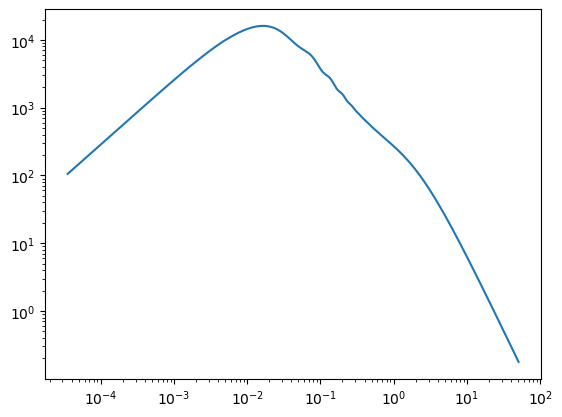

In [6]:
plt.plot(k, P_array_2d[0, :])
plt.xscale('log')
plt.yscale('log')

In [7]:
# Matter power spectrum_plus_ns
P_pl_ns_data = 'c:/Users/MICROSOSFT/Documents/Investigacion 1/ns_pl_eps_1p0E-2/Pnonlin-zk.txt'
P_deltas_pl_ns = pd.read_csv(P_pl_ns_data, header=None, delimiter=' ')  

sig_data_pl_ns = 'c:/Users/MICROSOSFT/Documents/Investigacion 1/ns_pl_eps_1p0E-2/sigma8-z.txt'
sig_pl_ns = pd.read_csv(sig_data_pl_ns, header=None, delimiter=' ')  

P_pl_ns = P_deltas_pl_ns.values * (sig_pl_ns.values ** 2)

# Matter power spectrum_minor_ns
P_mn_ns_data = 'c:/Users/MICROSOSFT/Documents/Investigacion 1/ns_mn_eps_1p0E-2/Pnonlin-zk.txt'
P_deltas_mn_ns = pd.read_csv(P_mn_ns_data, header=None, delimiter=' ') 

sig_data_mn_ns = 'c:/Users/MICROSOSFT/Documents/Investigacion 1/ns_mn_eps_1p0E-2/sigma8-z.txt'
sig_mn_ns = pd.read_csv(sig_data_mn_ns, header=None, delimiter=' ')  

P_mn_ns = P_deltas_mn_ns.values * (sig_mn_ns.values ** 2)

# Matter power spectrum_plus_sigma8
P_pl_sigma8_data = 'c:/Users/MICROSOSFT/Documents/Investigacion 1/s8_pl_eps_1p0E-2/Pnonlin-zk.txt'
P_deltas_pl_sigma8 = pd.read_csv(P_pl_sigma8_data, header=None, delimiter=' ')  

sig_data_pl_sigma_8 = 'c:/Users/MICROSOSFT/Documents/Investigacion 1/s8_pl_eps_1p0E-2/sigma8-z.txt'
sig_pl_sigma_8 = pd.read_csv(sig_data_pl_sigma_8, header=None, delimiter=' ') 

P_pl_sigma8 = P_deltas_pl_sigma8.values * (sig_pl_sigma_8.values) ** 2

# Matter power spectrum_minor_sigma8
P_mn_sigma8_data = 'c:/Users/MICROSOSFT/Documents/Investigacion 1/s8_mn_eps_1p0E-2/Pnonlin-zk.txt'
P_deltas_mn_sigma8 = pd.read_csv(P_mn_sigma8_data, header=None, delimiter=' ')  

sig_data_mn_sigma_8 = 'c:/Users/MICROSOSFT/Documents/Investigacion 1/s8_mn_eps_1p0E-2/sigma8-z.txt'
sig_mn_sigma_8 = pd.read_csv(sig_data_mn_sigma_8, header=None, delimiter=' ') 

P_mn_sigma8 = P_deltas_mn_sigma8.values * (sig_mn_sigma_8.values) ** 2

# Matter power spectrum_plus_Omega_b
P_pl_Omb_data = 'c:/Users/MICROSOSFT/Documents/Investigacion 1/Ob_pl_eps_1p0E-2/Pnonlin-zk.txt'
P_deltas_pl_Omb = pd.read_csv(P_pl_Omb_data, header=None, delimiter=' ')  

sig_data_pl_Om_b = 'c:/Users/MICROSOSFT/Documents/Investigacion 1/s8_mn_eps_1p0E-2/sigma8-z.txt'
sig_pl_Om_b = pd.read_csv(sig_data_pl_Om_b, header=None, delimiter=' ') 

P_pl_Omb = P_deltas_pl_Omb.values * (sig_pl_Om_b.values ** 2)

# Matter power spectrum_minor_Omega_b
P_mn_Omb_data = 'c:/Users/MICROSOSFT/Documents/Investigacion 1/Ob_mn_eps_1p0E-2/Pnonlin-zk.txt'
P_deltas_mn_Omb = pd.read_csv(P_mn_Omb_data, header=None, delimiter=' ')  

sig_data_mn_Om_b = 'c:/Users/MICROSOSFT/Documents/Investigacion 1/Ob_mn_eps_1p0E-2/sigma8-z.txt'
sig_mn_Om_b = pd.read_csv(sig_data_mn_Om_b, header=None, delimiter=' ') 

P_mn_Omb = P_deltas_mn_Omb.values * (sig_mn_Om_b.values ** 2)

# Matter power spectrum_plus_h
P_pl_h_data = 'c:/Users/MICROSOSFT/Documents/Investigacion 1/h_pl_eps_1p0E-2/Pnonlin-zk.txt'
P_deltas_pl_h = pd.read_csv(P_pl_h_data, header=None, delimiter=' ')  

sig_data_pl_h = 'c:/Users/MICROSOSFT/Documents/Investigacion 1/h_pl_eps_1p0E-2/sigma8-z.txt'
sig_pl_h = pd.read_csv(sig_data_pl_h, header=None, delimiter=' ') 

P_pl_h = P_deltas_pl_h.values * (sig_pl_h.values ** 2)

# Matter power spectrum_minor_h
P_mn_h_data = 'c:/Users/MICROSOSFT/Documents/Investigacion 1/h_mn_eps_1p0E-2/Pnonlin-zk.txt'
P_deltas_mn_h = pd.read_csv(P_mn_h_data, header=None, delimiter=' ')  

sig_data_mn_h = 'c:/Users/MICROSOSFT/Documents/Investigacion 1/h_mn_eps_1p0E-2/sigma8-z.txt'
sig_mn_h = pd.read_csv(sig_data_mn_h, header=None, delimiter=' ') 

P_mn_h = P_deltas_mn_h.values * (sig_mn_h.values ** 2)

# Matter power spectrum_plus_Om
P_pl_Om_data = 'c:/Users/MICROSOSFT/Documents/Investigacion 1/Om_pl_eps_1p0E-2/Pnonlin-zk.txt'
P_deltas_pl_Om = pd.read_csv(P_pl_Om_data, header=None, delimiter=' ')  

sig_data_pl_Om_m = 'c:/Users/MICROSOSFT/Documents/Investigacion 1/Om_pl_eps_1p0E-2/sigma8-z.txt'
sig_pl_Om_m= pd.read_csv(sig_data_pl_Om_m, header=None, delimiter=' ') 

P_pl_Om = P_deltas_pl_Om.values * (sig_pl_Om_m.values ** 2)

# Matter power spectrum_minor_Om
P_mn_Om_data = 'c:/Users/MICROSOSFT/Documents/Investigacion 1/Om_mn_eps_1p0E-2/Pnonlin-zk.txt'
P_deltas_mn_Om = pd.read_csv(P_mn_Om_data, header=None, delimiter=' ')  

sig_data_mn_Om_m = 'c:/Users/MICROSOSFT/Documents/Investigacion 1/Om_mn_eps_1p0E-2/sigma8-z.txt'
sig_mn_Om_m = pd.read_csv(sig_data_mn_Om_m, header=None, delimiter=' ') 

P_mn_Om = P_deltas_mn_Om.values * (sig_mn_Om_m.values ** 2)

In [8]:
sig_mn_Om_b.values.shape

(101, 1)

In [9]:
SIG8 = np.ones((101, 710))*sig_8_del.values
A = np.ones((101, 710))*sig_pl_sigma_8.values
B = np.ones((101, 710))*sig_mn_sigma_8.values

In [10]:
sig_pl = RectBivariateSpline(z_array, k_array, A)
sig_mn = RectBivariateSpline(z_array, k_array, B)
sigma_normal = RectBivariateSpline(z_array, k_array, SIG8)

In [11]:
# P_delta_delta

interp_func = RectBivariateSpline(z_array, k_array, P_array_2d)

# Derivada NS

der_P_ns_pl = RectBivariateSpline(z_array, k_array, P_pl_ns)

der_P_ns_mn = RectBivariateSpline(z_array, k_array, P_mn_ns)

# Derivada SIGMA8

der_P_sigma8_pl = RectBivariateSpline(z_array, k_array, P_pl_sigma8)

der_P_sigma8_mn = RectBivariateSpline(z_array, k_array, P_mn_sigma8)

# Derivada Om_b

der_P_Omega_b0_pl = RectBivariateSpline(z_array, k_array, P_pl_Omb)

der_P_Omega_b0_mn = RectBivariateSpline(z_array, k_array, P_mn_Omb)

# Derivada h

der_P_h_pl = RectBivariateSpline(z_array, k_array, P_pl_h)

der_P_h_mn = RectBivariateSpline(z_array, k_array, P_mn_h)

# Derivada Om

der_P_Omega_m0_pl = RectBivariateSpline(z_array, k_array, P_pl_Om)

der_P_Omega_m0_mn = RectBivariateSpline(z_array, k_array, P_mn_Om)

In [12]:
interp_func(0.001, 2e-5)

array([[105.19371481]])

In [13]:
class ClassIntegration:
    def __init__(self, params):
        self.z = params['z']
        self.model = params['model']

    def E2(self, z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma):
        if self.model == 'ACDM_flat':
            Omega_k0 = 0 
            Omega_DE0 = 1 - (Omega_m0)
            w0, wa = -1, 0
        elif self.model == 'ACDM_non_flat':
            Omega_k0 = 1 - (Omega_m0 + Omega_DE0)
            w0, wa = -1, 0
        elif self.model == 'non_ACDM_flat':
            Omega_k0 = 0 
            Omega_DE0 = 1 - (Omega_m0)
        elif self.model == 'non_ACDM_non_flat':
            Omega_k0 = 1 - (Omega_m0 + Omega_DE0)
        elif self.model == 'non_ACDM_flat_gamma':
            Omega_k0 = 0
            Omega_DE0 = 1 - (Omega_m0)
        elif self.model == 'non_ACDM_non_flat_gamma':
            Omega_k0 = 0
        radicando = Omega_m0 * (1 + z)**3 + (Omega_DE0 * (1 + z)**(3 * (1 + wa + w0)) * np.exp(-3 * wa * (z / (1 + z)))) + (Omega_k0) * (1 + z)**2
        return np.sqrt(radicando)

    def inverse_E2(self, z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma):
        return 1 / self.E2(z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)

    def n_t(self, z):
        z_m, z_0 = 0.9, 0.9 / np.sqrt(2)
        return ((z / z_0)**2) * np.exp(-(z / z_0)**(3 / 2))

    def p_ph(self, z_p, z):
        def gauss(c, z0, s, z, zp):
            return (1 / (np.sqrt(2 * np.pi) * s * (1 + z))) * np.exp(-0.5 * ((z - (c * zp) - z0) / (s * (1 + z)))**2)
        return (1 - 0.1) * gauss(1, 0, 0.05, z, z_p) + 0.1 * gauss(1, 0.1, 0.05, z, z_p)

    def r(self, z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma):
        H_0 = (100 * h)
        z_prime = np.linspace(0, z, 30)
        delta = z / len(z_prime)
        integrand = self.inverse_E2(z_prime, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) * delta
        return np.sum(integrand) * (c / 67) 
    
    def r_w(self, z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma):
        H_0 = (100 * h)
        z_prime = np.linspace(0, z, 30)
        delta = z / len(z_prime)
        integrand = self.inverse_E2(z_prime, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) * delta
        return np.sum(integrand) * (c / 67) * (H_0 / c)

    def n_i_try(self, i, z):
        z_bins = [0.001, 0.42, 0.56, 0.68, 0.79, 0.9, 1.02, 1.15, 1.32, 1.58, 2.5]
        denominators = np.array([0.04599087, 0.04048852, 0.04096115, 0.03951212, 0.03886145, 0.03944441, 0.03751183, 0.03950185, 0.04042198, 0.03827518])

        def numerator_n_i(i, z):
            z_prime = np.linspace(z_bins[i], z_bins[i + 1], 50)
            delta = (z_bins[i + 1] - z_bins[i]) / len(z_prime)
            multiplication_array = self.n_t(z) * self.p_ph(z_prime, z)
            return np.sum(multiplication_array * delta)

        return numerator_n_i(i, z) / denominators[i]

    def Window2(self, i, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma):
        H_0 = (100 * h)
        result = []
        for z in self.z:
            z_max = 2.5
            z_prime = np.linspace(z, z_max, 20)
            delta = (z_max - z) / len(z_prime)
            r_true = self.r_w(z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) 
            n_array = np.array([self.n_i_try(i, zs) for zs in z_prime])
            r_array = np.array([(self.r_w(zs, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)) for zs in z_prime])
            integrand = n_array * (1 - (r_true  / r_array)) * delta
            result.append(np.sum(integrand))
        return np.array(result)

In [14]:
z = np.linspace(0.001, 2.4, 20)

params = {'z': z, 'model': 'ACDM_flat'}

A = ClassIntegration(params)

In [15]:
r = A.E2(z, Omega_m0, h - 0.01, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)

r

array([1.00048036, 1.06694905, 1.14468529, 1.23312538, 1.33158797,
       1.43935894, 1.55574611, 1.68010915, 1.81187236, 1.9505268 ,
       2.09562679, 2.24678368, 2.40365873, 2.5659563 , 2.73341747,
       2.90581453, 3.08294627, 3.26463392, 3.45071787, 3.64105479])

In [16]:
class CosmicShear:
    def __init__(self, cosmic_paramss):
        self.z = cosmic_paramss['z']
        self.l = cosmic_paramss['l']
        self.universe = cosmic_paramss['type']
        self.model = cosmic_paramss['model']

    def E2(self, z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma):
        if self.model == 'ACDM_flat':
            Omega_k0 = 0 
            Omega_DE0 = 1 - (Omega_m0)
            w0, wa = -1, 0
        elif self.model == 'ACDM_non_flat':
            Omega_k0 = 1 - (Omega_m0 + Omega_DE0)
            w0, wa = -1, 0
        elif self.model == 'non_ACDM_flat':
            Omega_k0 = 0 
            Omega_DE0 = 1 - (Omega_m0)
        elif self.model == 'non_ACDM_non_flat':
            Omega_k0 = 1 - (Omega_m0 + Omega_DE0)
        elif self.model == 'non_ACDM_flat_gamma':
            Omega_k0 = 0
            Omega_DE0 = 1 - (Omega_m0)
        elif self.model == 'non_ACDM_non_flat_gamma':
            Omega_k0 = 0
        radicando = Omega_m0 * (1 + z)**3 + (Omega_DE0 * (1 + z)**(3 * (1 + wa + w0)) * np.exp(-3 * wa * (z / (1 + z)))) + (Omega_k0) * (1 + z)**2
        return np.sqrt(radicando)

    def inverse_E2(self, z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma):
        return 1 / self.E2(z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)

    def r(self, z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma):
        H_0 = (100 * h)
        z_prime = np.linspace(0, z, 30)
        delta = z / len(z_prime)
        integrand = self.inverse_E2(z_prime, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) * delta
        return np.sum(integrand) * (c / 67) 

    def r_w(self, z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma):
        H_0 = (100 * h)
        z_prime = np.linspace(0, z, 30)
        delta = z / len(z_prime)
        integrand = self.inverse_E2(z_prime, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) * delta
        return np.sum(integrand)* (c / 67) * (H_0 / c)

    def SN(self, i, j):
        return (0.3**2) / 35454308.58 if i == j else 0

    def D(self, z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma):
        z_prime = np.linspace(0, z, 30)
        E_array = self.E2(z_prime, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)
        Omega_m = (Omega_m0  * (1 + z_prime)**3) / (E_array**2)
        delta = z / len(z_prime)
        integral = np.sum((Omega_m**gamma / (1 + z_prime)) * delta)
        return np.exp(-integral)
    
    def dD(self, z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, parametro):
        epsilon = 0.01
        if parametro == 'Omega_m0':
            D_pl= self.D(z, Omega_m0 * (1 + epsilon), h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)
            D_mn= self.D(z, Omega_m0 * (1 - epsilon), h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)
            return (D_pl - D_mn) / (2 * epsilon * Omega_m0)
        elif parametro == 'Omega_DE0':
            D_pl= self.D(z, Omega_m0, h, Omega_b0, Omega_DE0 * (1 + epsilon), w0, wa, ns, sigma8, gamma)
            D_mn= self.D(z, Omega_m0, h, Omega_b0, Omega_DE0 * (1 - epsilon), w0, wa, ns, sigma8, gamma)
            return (D_pl - D_mn) / (2 * epsilon * Omega_DE0)
        elif parametro == 'w0':
            D_pl= self.D(z, Omega_m0, h, Omega_b0, Omega_DE0, w0 * (1 + epsilon), wa, ns, sigma8, gamma)
            D_mn= self.D(z, Omega_m0, h, Omega_b0, Omega_DE0, w0 * (1 - epsilon), wa, ns, sigma8, gamma)
            return (D_pl - D_mn) / (2 * epsilon * w0)
        elif parametro == 'wa':
            D_pl= self.D(z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa + epsilon, ns, sigma8, gamma)
            D_mn= self.D(z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa - epsilon, ns, sigma8, gamma)
            return (D_pl - D_mn) / (2 * epsilon)
        elif parametro == 'gamma':
            D_pl= self.D(z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma * (1 + epsilon))
            D_mn= self.D(z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma * (1 - epsilon))
            return (D_pl - D_mn) / (2 * epsilon * gamma)
        else: 
            return 1
    
    ###
    # P y sus derivadas

    interp_func = RectBivariateSpline(z_array, k_array, P_array_2d) # en k debe ir el log10 del k que quiero, y e resultado NO se eleva a 10

    # Calcular la diferencia finita en k
    dP_dk = np.diff(P_array_2d, axis=1) / np.diff(k_array)
    dP_dk_interp = RectBivariateSpline(z_array, k_array[0:-1], dP_dk)

    # derivadas
    der_P_ns_pl = RectBivariateSpline(z_array, k_array, P_pl_ns)
    der_P_ns_mn = RectBivariateSpline(z_array, k_array, P_mn_ns)
    der_P_sigma8_pl = RectBivariateSpline(z_array, k_array, P_pl_sigma8)
    der_P_sigma8_mn = RectBivariateSpline(z_array, k_array, P_mn_sigma8)
    der_P_Omega_b0_pl = RectBivariateSpline(z_array, k_array, P_pl_Omb)
    der_P_Omega_b0_mn = RectBivariateSpline(z_array, k_array, P_mn_Omb)
    der_P_h_pl = RectBivariateSpline(z_array, k_array, P_pl_h)
    der_P_h_mn = RectBivariateSpline(z_array, k_array, P_mn_h)
    der_P_Omega_m0_pl = RectBivariateSpline(z_array, k_array, P_pl_Om)
    der_P_Omega_m0_mn = RectBivariateSpline(z_array, k_array, P_mn_Om)

    def PK(self, z, k):
        return self.interp_func(z, k, grid=False)  # tiene que ir el log10 del k original y el resultado es igual al esperado, porque la interpolacion se hace con log10(k)
    
    def PPS(self, z, l, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma):
        k = ((10**l + 0.5) / (self.r(z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)))
        P = float(self.PK(z, k)) # esta bien asi
        if self.universe == 'standard':
            return P
        else:
            D_0 = self.D(0, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)
            D_array = self.D(z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)
            return P*((D_array/D_0)**2)
    
    def der_PPS_parametro(self, z, l, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, parametro):
        epsilon = 0.01
        H_0 = 100 * h
        def der_PPS_k(z, l, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma):
            k = ((10**l + 0.5) / (self.r(z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)))
            P = self.dP_dk_interp(z, k)
            if self.universe == 'standard':
                return float(P)
            else:
                D_0 = self.D(0, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)
                D_array = self.D(z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)
                return float(P * ((D_array/D_0)**2))
        
        
        def der_PK_parametro(z, k): #solo para h, Omega_m,0, ns, sigma8, Omega_b,0
            Pk = self.PK(z, k)
            der_P_alpha_pl_1 = globals()['der_P_' + parametro + '_pl'](z, k, grid = False)
            der_P_alpha_mn_1 = globals()['der_P_' + parametro + '_mn'](z, k, grid = False)
            P = (np.log(der_P_alpha_pl_1) - np.log(der_P_alpha_mn_1)) / (2 * epsilon * globals()[parametro])
            if self.universe == 'standard':
                return float(Pk * P)
            else:
                D_0 = self.D(0, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)
                D_array = self.D(z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)
                der_D = self.dD(z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, parametro)
                return float( (P * ((D_array/D_0)**2)) + (2 * D_array * der_D))
            
        k = ((10**l + 0.5) / (self.r(z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)))
        third = der_PPS_k(z, l, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)

        if parametro == 'h':
            first = der_PK_parametro(z, k)
            k_pl = (10**l + 0.5)/(self.r(z, Omega_m0, h * (1 + epsilon), Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma))
            k_mn = (10**l + 0.5)/(self.r(z, Omega_m0, h * (1 - epsilon), Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma))
            second = (k_pl - k_mn) / (2 * epsilon * h)
            return first + (second * third)
        elif parametro == 'Omega_m0':
            first = der_PK_parametro(z, k)
            k_pl = (10**l + 0.5)/(self.r(z, Omega_m0 * (1 + epsilon), h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma))
            k_mn = (10**l + 0.5)/(self.r(z, Omega_m0 * (1 - epsilon), h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma))
            second = (k_pl - k_mn) / (2 * epsilon * Omega_m0)
            return first  + (second * third)
        elif parametro == 'Omega_DE0': 
            k_pl = (10**l + 0.5)/ (self.r(z, Omega_m0, h, Omega_b0, Omega_DE0*(1+epsilon), w0, wa, ns, sigma8, gamma))
            k_mn = (10**l + 0.5)/ (self.r(z, Omega_m0, h, Omega_b0, Omega_DE0*(1-epsilon), w0, wa, ns, sigma8, gamma))
            second = (k_pl - k_mn) / (2 * epsilon * Omega_DE0)
            return second * third
        elif parametro == 'w0': 
            k_pl = (10**l + 0.5)/(self.r(z, Omega_m0, h, Omega_b0, Omega_DE0, w0*(1 + epsilon), wa, ns, sigma8, gamma))
            k_mn = (10**l + 0.5)/(self.r(z, Omega_m0, h, Omega_b0, Omega_DE0, w0*(1 - epsilon), wa, ns, sigma8, gamma))
            second = -(k_pl - k_mn) / (2 * epsilon * w0)
            return second * third
        elif parametro == 'wa': 
            k_pl = (10**l + 0.5)/(self.r(z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa + epsilon, ns, sigma8, gamma))
            k_mn = (10**l + 0.5)/(self.r(z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa - epsilon, ns, sigma8, gamma))
            second = (k_pl - k_mn) / (2 * epsilon)
            return second * third
        elif parametro == 'sigma8':
            sigg_pl = sig_pl(z, k, grid = False)
            sigg_mn = sig_mn(z, k, grid = False)
            sigg_normal = sigma_normal(z, k, grid = False)
            Pk = self.PK(z, k) 
            der_P_alpha_pl_1 = der_P_sigma8_pl(z, k, grid = False) 
            der_P_alpha_mn_1 = der_P_sigma8_mn(z, k, grid = False) 
            P = ( (der_P_alpha_pl_1 / (sigg_pl ** 2)  - der_P_alpha_mn_1 / (sigg_mn ** 2)) / (2 * epsilon * sigma8) ) # + 2 * sigma8 * (self.D(z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma))**2
            if self.universe == 'standard':
                return float(P)
            else:
                D_0 = self.D(0, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)
                D_array = self.D(z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)
                return float( (P * ((D_array/D_0)**2)))
        elif parametro == 'sigma8_prueba':
            sigg_pl = sig_pl(z, k, grid = False)
            sigg_mn = sig_mn(z, k, grid = False)
            sigg_normal = sigma_normal(z, k, grid = False)
            Pk = self.PK(z, k) 
            der_P_alpha_pl_1 = der_P_sigma8_pl(z, k, grid = False) 
            der_P_alpha_mn_1 = der_P_sigma8_mn(z, k, grid = False) 
            P = ( (np.log(der_P_alpha_pl_1 )  - np.log(der_P_alpha_mn_1)) / (2 * epsilon * sigma8) ) 
            return float(Pk * P)  # / (sigg_normal ** 2))
        else:
            first = der_PK_parametro(z, k)
            return first
    ###
    def K(self, i ,j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia):

        H_0 = (100 * h)
        z_prime= self.z

        params = {'z': z_prime, 'model': self.model}
    
        A = ClassIntegration(params)

        E_array = self.E2(z_prime, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)
        Wi = np.array(A.Window2(i, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma))
        n_i_array = np.array([A.n_i_try(i, zs) for zs in z_prime])
        Wj = np.array(A.Window2(j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma))
        n_j_array = np.array([A.n_i_try(j, zs) for zs in z_prime])
        r_array = np.array([A.r_w(zs, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) for zs in z_prime])

        operador1 = ((1.5 * Omega_m0 * (1+z_prime)) **2) * ((H_0 / c) ** 3)
        operador2 = 1.5 * Omega_m0 * (1+z_prime) * ( (H_0 / c) ** 3)
        operador3 =  (H_0 / c) ** 3

        K_gg = operador1 * (Wi * Wj / (E_array))
        K_Ig = operador2 * ((n_i_array * Wj) + (n_j_array * Wi)) / (r_array) 
        K_II = operador3 * (n_i_array * n_j_array * E_array) / ((r_array) ** 2)

        return K_gg, K_Ig, K_II

    ###

    
    def Cosmic_Shear_l3(self, i ,j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia):
        z_max, z_min, z0 = 2.5, 0.001, 0.62
        z_prime, delta = self.z, (z_max - z_min) / len(self.z)
        SNs = self.SN(i, j)
        n = -0.41
        
        result = []

        D_array = np.array([self.D(zs, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) for zs in z_prime])
        K_gg, K_Ig, K_II = self.K(i ,j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)

        for i, l in enumerate(self.l):
            if l == self.l[-1]: 
                ls = l
            else:
                ls = np.log10((10**self.l[i+1] + 10**self.l[i])/2) 

            P_gg = np.array([self.PPS(z_primes, ls, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) for z_primes in z_prime])
            P_Ig = (-(Aia * Cia * Omega_m0) / D_array) * P_gg
            P_II = (((-(Aia * Cia * Omega_m0) / D_array)) ** 2) * P_gg

            integrand = ((K_gg * P_gg) + (K_Ig * P_Ig) + (K_II * P_II)) * float(delta)
            integral =  np.sum(integrand)
            integral_final = integral + SNs

            result.append(integral_final)

        return np.array(result)
    
    def Der_C_parametro(self, i ,j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia, parametro):
        z_max, z_min, z0 = 2.5, 0.001, 0.62
        z_prime, delta = self.z, (z_max - z_min) / len(self.z)
        result = []
        n = -0.41
        epsilon = 0.01

        D_array = np.array([self.D(zs, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) for zs in z_prime])
        K_gg, K_Ig, K_II = self.K(i ,j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)
        C = self.Cosmic_Shear_l3(i ,j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)

        if parametro == 'h':
            K_gg_pl, K_Ig_pl, K_II_pl = self.K(i ,j, Omega_m0, h * (1 + epsilon), Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)
            K_gg_mn, K_Ig_mn, K_II_mn = self.K(i ,j, Omega_m0, h * (1 - epsilon), Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)

            der_K_gg = (K_gg_pl - K_gg_mn) / (2*epsilon*h)
            der_K_Ig = (K_Ig_pl - K_Ig_mn) / (2*epsilon*h)
            der_K_II = (K_II_pl - K_II_mn) / (2*epsilon*h)

            for i, l in enumerate(self.l):
                if l == self.l[-1]: 
                    ls = np.log10((10**ls + 10**3.17609126)/2)
                else:
                    ls = np.log10((10**self.l[i+1] + 10**self.l[i])/2) 

                op1 = (-Aia * Cia * Omega_m0 / D_array)
                P_gg = np.array([self.PPS(z_primes, ls, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) for z_primes in z_prime])
                der_P_gg = np.array([self.der_PPS_parametro(z_primes, ls, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, parametro) for z_primes in z_prime])
                P_Ig = op1 * P_gg
                der_P_Ig = (op1 * der_P_gg)
                P_II = (op1 ** 2) * P_gg
                der_P_II = ((op1 ** 2) * der_P_gg)

                integrand = ((der_K_gg * P_gg) + (K_gg * der_P_gg) + (der_K_Ig * P_Ig)  + (K_Ig * der_P_Ig) + (der_K_II * P_II) + (K_II * der_P_II)) * float(delta)
                integral =  np.sum(integrand)
                integral_final = integral

                result.append(integral_final)

            return np.array(result)
        
        elif parametro == 'Omega_m0':
            D_array_pl = np.array([self.D(zs, Omega_m0 * (1 + epsilon), h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) for zs in z_prime])
            D_array_mn = np.array([self.D(zs, Omega_m0 * (1 - epsilon), h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) for zs in z_prime])
            der_D = (D_array_pl - D_array_mn) / (2 * epsilon * Omega_m0)
            K_gg_pl, K_Ig_pl, K_II_pl = self.K(i ,j, Omega_m0 * (1 + epsilon), h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)
            K_gg_mn, K_Ig_mn, K_II_mn = self.K(i ,j, Omega_m0 * (1 - epsilon), h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)

            der_K_gg = (K_gg_pl - K_gg_mn) /(2*epsilon*Omega_m0)
            der_K_Ig = (K_Ig_pl - K_Ig_mn) /(2*epsilon*Omega_m0)
            der_K_II = (K_II_pl - K_II_mn) /(2*epsilon*Omega_m0)

            for i, l in enumerate(self.l):
                if l == self.l[-1]: 
                    ls = np.log10((10**ls + 10**3.17609126)/2)
                else:
                    ls = np.log10((10**self.l[i+1] + 10**self.l[i])/2) 
                op1 = (-Aia * Cia * Omega_m0 / D_array)
                der_op_1 = -Aia * Cia * ((1 / D_array) - (Omega_m0*(der_D / (D_array**2))))
                P_gg = np.array([self.PPS(z_primes, ls, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) for z_primes in z_prime])
                der_P_gg = np.array([self.der_PPS_parametro(z_primes, ls, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, parametro) for z_primes in z_prime])
                P_Ig = op1 * P_gg
                der_P_Ig = (op1 * der_P_gg) + (der_op_1 * P_gg)
                P_II = (op1 ** 2) * P_gg
                der_P_II = ((op1 ** 2) * der_P_gg) + (2 * op1 * der_op_1 * der_P_gg)

                integrand = ((der_K_gg * P_gg) + (K_gg * der_P_gg) + (der_K_Ig * P_Ig)  + (K_Ig * der_P_Ig) + (der_K_II * P_II) + (K_II * der_P_II)) * float(delta)
                integral =  np.sum(integrand)
                integral_final = integral

                result.append(integral_final)

            return np.array(result)
        
        elif parametro == 'Aia':
            for i, l in enumerate(self.l):
                if l == self.l[-1]: 
                    ls = np.log10((10**ls + 10**3.17609126)/2)
                else:
                    ls = np.log10((10**self.l[i+1] + 10**self.l[i])/2) 

                P_gg = np.array([self.PPS(z_primes, ls, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)  for z_primes in z_prime])
                P_Ig_pl = (-Aia * (1 + epsilon) * Cia * Omega_m0 / D_array) * P_gg
                P_Ig_mn = (-Aia * (1 - epsilon) * Cia * Omega_m0 / D_array) * P_gg
                P_II_pl = ((-Aia * (1 + epsilon) * Cia * Omega_m0 / D_array) ** 2) * P_gg
                P_II_mn = ((-Aia * (1 - epsilon) * Cia * Omega_m0 / D_array) ** 2) * P_gg
                der_P_Ig = (P_Ig_pl - P_Ig_mn) / (2 * epsilon * Aia)
                der_P_II = (P_II_pl - P_II_mn) / (2 * epsilon * Aia)

                integrand = ((K_Ig * der_P_Ig) + (K_II * der_P_II)) * float(delta)
                integral =  np.sum(integrand)
                integral_final = integral

                result.append(integral_final)

            return np.array(result)
        
        elif parametro == 'Omega_DE0':
            C_pl = np.log(self.Cosmic_Shear_l3(i ,j, Omega_m0, h , Omega_b0, Omega_DE0 * (1 + epsilon), w0, wa, ns, sigma8, gamma, Aia, Cia))
            C_mn = np.log(self.Cosmic_Shear_l3(i ,j, Omega_m0, h , Omega_b0, Omega_DE0 * (1 - epsilon), w0, wa, ns, sigma8, gamma, Aia, Cia))
            der = (C_pl - C_mn) / (2*epsilon*Omega_DE0)
            return der * C

        elif parametro == 'w0':
            C_pl = np.log(self.Cosmic_Shear_l3(i ,j, Omega_m0, h , Omega_b0, Omega_DE0, w0 * (1 + epsilon), wa, ns, sigma8, gamma, Aia, Cia))
            C_mn = np.log(self.Cosmic_Shear_l3(i ,j, Omega_m0, h , Omega_b0, Omega_DE0, w0 * (1 - epsilon), wa, ns, sigma8, gamma, Aia, Cia))
            der = (C_pl - C_mn) / (2*epsilon*w0)
            return der * C
        
        elif parametro == 'wa':
            C_pl = np.log(self.Cosmic_Shear_l3(i ,j, Omega_m0, h , Omega_b0, Omega_DE0, w0, wa + epsilon, ns, sigma8, gamma, Aia, Cia))       
            C_mn = np.log(self.Cosmic_Shear_l3(i ,j, Omega_m0, h , Omega_b0, Omega_DE0, w0, wa - epsilon, ns, sigma8, gamma, Aia, Cia))       
            der = (C_pl - C_mn) / (2*epsilon)
            return der * C
        
        elif parametro == 'gamma':
            C_pl = np.log(self.Cosmic_Shear_l3(i ,j, Omega_m0, h , Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma * (1 + epsilon), Aia, Cia))
            C_mn = np.log(self.Cosmic_Shear_l3(i ,j, Omega_m0, h , Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma * (1 - epsilon), Aia, Cia))
            der = (C_pl - C_mn) / (2*epsilon*gamma)
            return der * C
        
        elif parametro == 'sigma8':
            for i, ls in enumerate(self.l):
                if ls == self.l[-1]: 
                    ls = np.log10((10**ls + 10**3.17609126)/2)
                else:
                    ls = np.log10((10**self.l[i+1] + 10**self.l[i])/2) 

                op1 = (-Aia * Cia * Omega_m0 / D_array)
                der_P_gg = np.array([self.der_PPS_parametro(z_primes, ls, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, parametro) for z_primes in z_prime])
                der_P_Ig = op1 * der_P_gg
                der_P_II = (op1 ** 2) * der_P_gg

                integrand = ((K_gg * der_P_gg) + (K_Ig * der_P_Ig) + (K_II * der_P_II)) * float(delta)
                integral =  np.sum(integrand)
                integral_final = integral 

                result.append(integral_final)

            return np.array(result)
        else:
            # ns, sigma8, Omega_b0
            for i, ls in enumerate(self.l):
                if ls == self.l[-1]: 
                    ls = np.log10((10**ls + 10**3.17609126)/2)
                else:
                    ls = np.log10((10**self.l[i+1] + 10**self.l[i])/2) 

                op1 = (-Aia * Cia * Omega_m0 / D_array)
                der_P_gg = np.array([self.der_PPS_parametro(z_primes, ls, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, parametro) for z_primes in z_prime])
                der_P_Ig = op1 * der_P_gg
                der_P_II = (op1 ** 2) * der_P_gg

                integrand = ((K_gg * der_P_gg) + (K_Ig * der_P_Ig) + (K_II * der_P_II)) * float(delta)
                integral =  np.sum(integrand)
                integral_final = integral 

                result.append(integral_final)

            return np.array(result)

In [17]:
L_array = np.log10(np.logspace(np.log10(10), np.log10(1500), 100))
z = np.linspace(0.001, 2.5, 20)
cosmic_params = {'l': L_array , 'z': np.linspace(0.001, 2.5, 20), 'type': 'standard', 'model' : 'ACDM_flat'}

A = CosmicShear(cosmic_params)

P_1 = np.array([A.der_PPS_parametro(z[0], l, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, 'sigma8') for l in L_array])

P_2 = np.array([A.der_PPS_parametro(z[0], l, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, 'sigma8_prueba') for l in L_array])

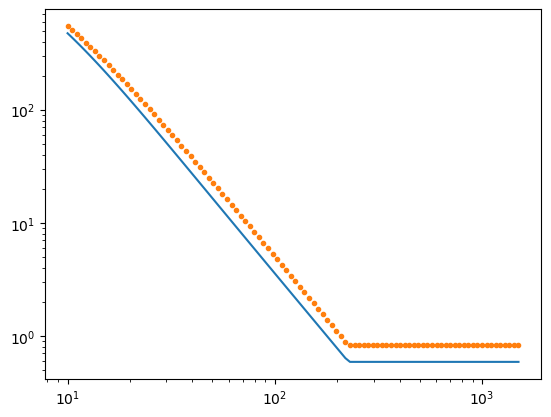

In [18]:
plt.plot(10**L_array, P_1)
plt.plot(10**L_array, P_2, '.')
plt.xscale('log')
plt.yscale('log')

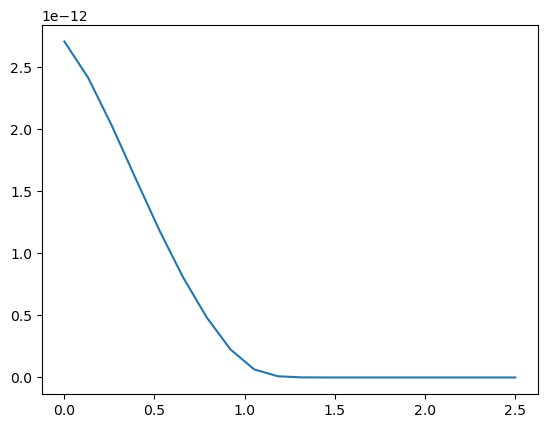

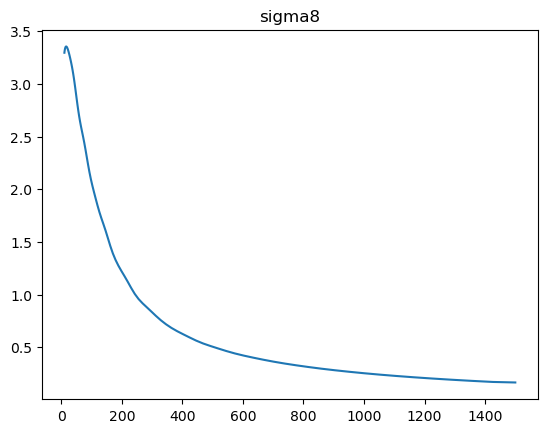

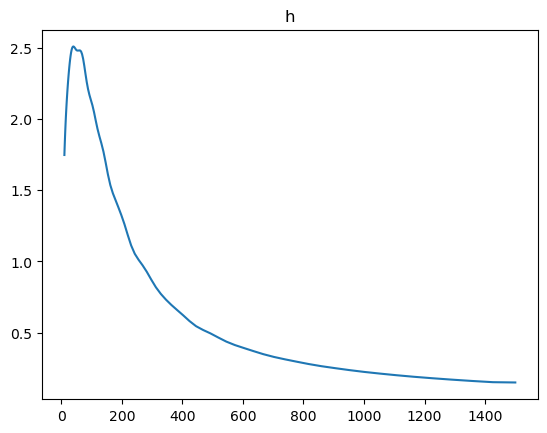

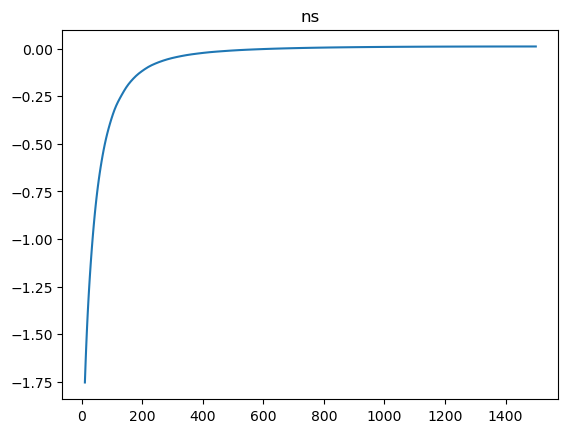

In [19]:
L_array = np.log10(np.logspace(np.log10(10), np.log10(1500), 100))
cosmic_params = {'l': L_array , 'z': np.linspace(0.001, 2.5, 20), 'type': 'standard', 'model' : 'ACDM_flat'}

A = CosmicShear(cosmic_params)

F = A.Der_C_parametro(5 ,5, 0.01, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia, 'sigma8')
H = A.Der_C_parametro(6 ,9, 0.01, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia, 'h')
NS = A.Der_C_parametro(5 ,5, 0.01, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia, 'ns')
C = A.Cosmic_Shear_l3(5, 5, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)
M, N, L = A.K(6, 9, Omega_m0, h + 0.01, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)
M_1, N_1, L_1 = A.K(6, 9, Omega_m0, h - 0.01, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)

plt.plot(np.linspace(0.001, 2.5, 20), M)
plt.show()

plt.plot(10**L_array, F / C)
plt.title('sigma8')
plt.show()

plt.plot(10**L_array, H / C)
plt.title('h')
plt.show()

plt.plot(10**L_array, NS / C)
plt.title('ns')
plt.show()

In [20]:
L_array

array([1.        , 1.02198072, 1.04396144, 1.06594216, 1.08792288,
       1.1099036 , 1.13188432, 1.15386504, 1.17584576, 1.19782648,
       1.2198072 , 1.24178792, 1.26376864, 1.28574936, 1.30773008,
       1.3297108 , 1.35169152, 1.37367224, 1.39565296, 1.41763368,
       1.4396144 , 1.46159512, 1.48357584, 1.50555656, 1.52753727,
       1.54951799, 1.57149871, 1.59347943, 1.61546015, 1.63744087,
       1.65942159, 1.68140231, 1.70338303, 1.72536375, 1.74734447,
       1.76932519, 1.79130591, 1.81328663, 1.83526735, 1.85724807,
       1.87922879, 1.90120951, 1.92319023, 1.94517095, 1.96715167,
       1.98913239, 2.01111311, 2.03309383, 2.05507455, 2.07705527,
       2.09903599, 2.12101671, 2.14299743, 2.16497815, 2.18695887,
       2.20893959, 2.23092031, 2.25290103, 2.27488175, 2.29686247,
       2.31884319, 2.34082391, 2.36280463, 2.38478535, 2.40676607,
       2.42874679, 2.45072751, 2.47270823, 2.49468895, 2.51666967,
       2.53865039, 2.5606311 , 2.58261182, 2.60459254, 2.62657

In [21]:
class Fisher:
    '''
    Calculate Fisher Matrix
    '''
    def __init__(self, params):
        self.num = params['num_params']
        self.universes = params['type']
        self.model = params['model']

    def trace(self, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia):
        F = np.zeros((self.num + 1, self.num + 1))
        L_array = np.log10(np.logspace(np.log10(10), np.log10(1500), 100))
        cosmic_params = {'l': L_array , 'z': np.linspace(0.001, 2.5, 50), 'type': self.universes, 'model': self.model}
        A = CosmicShear(cosmic_params)
        
        f_sky = 0.3636
        epsilon = 0.01
        C = np.zeros((10, 10), dtype=object)
        dC_dq_Om_m_matrix = np.zeros((10, 10), dtype=object)
        dC_dq_h_matrix = np.zeros((10, 10), dtype=object)
        dC_dq_Om_b_matrix = np.zeros((10, 10), dtype=object)
        dC_dq_Om_DE_matrix = np.zeros((10, 10), dtype=object)
        dC_dq_w0_matrix = np.zeros((10, 10), dtype=object)
        dC_dq_wa_matrix = np.zeros((10, 10), dtype=object)
        dC_dq_ns_matrix = np.zeros((10, 10), dtype=object)
        dC_dq_sig_matrix = np.zeros((10, 10), dtype=object)
        dC_dq_gamma_matrix = np.zeros((10, 10), dtype=object)
        dC_dq_Aia_matrix = np.zeros((10, 10), dtype=object)
        
        for i in range(10):
            for j in range(i, 10):
                logging.info(f"Calculated pair: {(i, j)}")
                C[i, j] = C[j, i] = A.Cosmic_Shear_l3(i, j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)
                dC_dq_Om_m_matrix[i, j] = dC_dq_Om_m_matrix[j, i] = A.Der_C_parametro(i ,j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia, 'Omega_m0')
                dC_dq_h_matrix[i, j] = dC_dq_h_matrix[j, i] = A.Der_C_parametro(i ,j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia, 'h')
                dC_dq_Om_b_matrix[i, j] = dC_dq_Om_b_matrix[j, i] = A.Der_C_parametro(i ,j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia, 'Omega_b0')
              #  dC_dq_Om_DE_matrix[i, j] = dC_dq_Om_DE_matrix[j, i] =  A.Der_C_parametro(i, j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia, 'Omega_DE0')
              #  dC_dq_w0_matrix[i, j] = dC_dq_w0_matrix[j, i] = A.Der_C_parametro(i, j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia, 'w0')
              #  dC_dq_wa_matrix[i, j] = dC_dq_wa_matrix[j, i] = A.Der_C_parametro(i, j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia, 'wa')
                dC_dq_ns_matrix[i, j] =  dC_dq_ns_matrix[j, i]  = A.Der_C_parametro(i ,j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia, 'ns')
                dC_dq_sig_matrix[i, j] = dC_dq_sig_matrix[j, i] = A.Der_C_parametro(i ,j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia, 'sigma8')
               # dC_dq_gamma_matrix[i, j] = dC_dq_gamma_matrix[j, i] = A.Der_C_parametro(i, j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia, 'gamma')
                dC_dq_Aia_matrix[i, j] =  dC_dq_Aia_matrix[j, i]  = A.Der_C_parametro(i ,j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia, 'Aia')

        C_matrix = np.array(C.tolist(), dtype=float)
        C_matrix_2d = np.squeeze(C_matrix)

        dC_dq_Om_m_matrix = np.array(dC_dq_Om_m_matrix.tolist(), dtype=float)
        dC_dq_h_matrix = np.array(dC_dq_h_matrix.tolist(), dtype=float)
        dC_dq_Om_b_matrix = np.array(dC_dq_Om_b_matrix.tolist(), dtype=float)
       # dC_dq_Om_DE_matrix = np.array(dC_dq_Om_DE_matrix.tolist(), dtype=float)
       # dC_dq_w0_matrix = np.array(dC_dq_w0_matrix.tolist(), dtype=float)
       # dC_dq_wa_matrix = np.array(dC_dq_wa_matrix.tolist(), dtype=float)
        dC_dq_ns_matrix = np.array(dC_dq_ns_matrix.tolist(), dtype=float)
        dC_dq_sig_matrix = np.array(dC_dq_sig_matrix.tolist(), dtype=float)
        #dC_dq_gamma_matrix = np.array(dC_dq_gamma_matrix.tolist(), dtype=float)
        dC_dq_Aia_matrix = np.array(dC_dq_Aia_matrix.tolist(), dtype=float)

        dC_dq_Om_m_matrix_2d = np.squeeze(dC_dq_Om_m_matrix)
        dC_dq_h_matrix_2d = np.squeeze(dC_dq_h_matrix)
        dC_dq_Om_b_matrix_2d = np.squeeze(dC_dq_Om_b_matrix)
       # dC_dq_Om_DE_matrix_2d = np.squeeze(dC_dq_Om_DE_matrix)
       # dC_dq_w0_matrix_2d = np.squeeze(dC_dq_w0_matrix)
       # dC_dq_wa_matrix_2d = np.squeeze(dC_dq_wa_matrix)
        dC_dq_ns_matrix_2d = np.squeeze(dC_dq_ns_matrix)
        dC_dq_sig_matrix_2d = np.squeeze(dC_dq_sig_matrix)
       # dC_dq_gamma_matrix_2d = np.squeeze(dC_dq_gamma_matrix)
        dC_dq_Aia_matrix_2d = np.squeeze(dC_dq_Aia_matrix)
        
        for i, l in enumerate(L_array):

            if i < len(L_array) - 1:
                delta_l = 10**L_array[i+1] - 10**L_array[i]
                #k = (1/2 + 10**L_array[i]) / A.r(z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)
                #k_1 = k = (1/2 + 10**L_array[i+1]) / A.r(z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)
                #lambda_min = L_array[0]
                #lambda_max = L_array[-1]
                #lambda_k = lambda_min + (k- 1)*(lambda_max - lambda_min) / len(L_array)
                #lambda_k_1 = lambda_min + (k_1 - 1)*(lambda_max - lambda_min) / len(L_array)
                #delta_l = 10**(lambda_k_1) - 10**(lambda_k)
            else: 
                 delta_l = 1
                 
            L_parameter = np.sqrt((2 / ((2*(10**l) + 1)*delta_l*f_sky)))
            C_inv = np.linalg.inv(L_parameter * C_matrix_2d[:, :, i])

            #OMEGA_M 
            Om_m_Om_m = np.trace(dC_dq_Om_m_matrix_2d[:, :, i] @ C_inv @ dC_dq_Om_m_matrix_2d[:, :, i] @ C_inv)
            Om_m_h = np.trace(dC_dq_Om_m_matrix_2d[:, :, i] @ C_inv @ dC_dq_h_matrix_2d[:, :, i] @ C_inv)
            Om_m_Om_b = np.trace(dC_dq_Om_m_matrix_2d[:, :, i] @ C_inv @ dC_dq_Om_b_matrix_2d[:, :, i] @ C_inv)
          #  Om_m_Om_DE = np.trace(dC_dq_Om_m_matrix_2d[:, :, i] @ C_inv @ dC_dq_Om_DE_matrix_2d[:, :, i] @ C_inv)
          #  Om_m_w0 = np.trace(dC_dq_Om_m_matrix_2d[:, :, i] @ C_inv @ dC_dq_w0_matrix_2d[:, :, i] @ C_inv)
          #  Om_m_wa = np.trace(dC_dq_Om_m_matrix_2d[:, :, i] @ C_inv @ dC_dq_wa_matrix_2d[:, :, i] @ C_inv)
            Om_m_ns = np.trace(dC_dq_Om_m_matrix_2d[:, :, i] @ C_inv @ dC_dq_ns_matrix_2d[:, :, i] @ C_inv)
            Om_m_sig = np.trace(dC_dq_Om_m_matrix_2d[:, :, i] @ C_inv @ dC_dq_sig_matrix_2d[:, :, i] @ C_inv)
           # Om_m_gamma = np.trace(dC_dq_Om_m_matrix_2d[:, :, i] @ C_inv @ dC_dq_gamma_matrix_2d[:, :, i] @ C_inv)
            Om_m_Aia = np.trace(dC_dq_Om_m_matrix_2d[:, :, i] @ C_inv @ dC_dq_Aia_matrix_2d[:, :, i] @ C_inv)
#

            #H
            h_h = np.trace(dC_dq_h_matrix_2d[:, :, i] @ C_inv @ dC_dq_h_matrix_2d[:, :, i] @ C_inv)
            h_Om_b = np.trace(dC_dq_h_matrix_2d[:, :, i] @ C_inv @ dC_dq_Om_b_matrix_2d[:, :, i] @ C_inv)
          #  h_Om_DE = np.trace(dC_dq_h_matrix_2d[:, :, i] @ C_inv @ dC_dq_Om_DE_matrix_2d[:, :, i] @ C_inv)
          #  h_w0 = np.trace(dC_dq_h_matrix_2d[:, :, i] @ C_inv @ dC_dq_w0_matrix_2d[:, :, i] @ C_inv)
          #  h_wa = np.trace(dC_dq_h_matrix_2d[:, :, i] @ C_inv @ dC_dq_wa_matrix_2d[:, :, i] @ C_inv)
            h_ns = np.trace(dC_dq_h_matrix_2d[:, :, i] @ C_inv @ dC_dq_ns_matrix_2d[:, :, i] @ C_inv)
            h_sig = np.trace(dC_dq_h_matrix_2d[:, :, i] @ C_inv @ dC_dq_sig_matrix_2d[:, :, i] @ C_inv)
           # h_gamma = np.trace(dC_dq_h_matrix_2d[:, :, i] @ C_inv @ dC_dq_gamma_matrix_2d[:, :, i] @ C_inv)
            h_Aia = np.trace(dC_dq_h_matrix_2d[:, :, i] @ C_inv @ dC_dq_Aia_matrix_2d[:, :, i] @ C_inv)
#
            #OMEGA_B
            Om_b_Om_b = np.trace(dC_dq_Om_b_matrix_2d[:, :, i] @ C_inv @ dC_dq_Om_b_matrix_2d[:, :, i] @ C_inv)
            #Om_b_Om_DE = np.trace(dC_dq_Om_b_matrix_2d[:, :, i] @ C_inv @ dC_dq_Om_DE_matrix_2d[:, :, i] @ C_inv)
            #Om_b_w0 = np.trace(dC_dq_Om_b_matrix_2d[:, :, i] @ C_inv @ dC_dq_w0_matrix_2d[:, :, i] @ C_inv)
 #           Om_b_wa = np.trace(dC_dq_Om_b_matrix_2d[:, :, i] @ C_inv @ dC_dq_wa_matrix_2d[:, :, i] @ C_inv)
            Om_b_ns = np.trace(dC_dq_Om_b_matrix_2d[:, :, i] @ C_inv @ dC_dq_ns_matrix_2d[:, :, i] @ C_inv)
            Om_b_sig = np.trace(dC_dq_Om_b_matrix_2d[:, :, i] @ C_inv @ dC_dq_sig_matrix_2d[:, :, i] @ C_inv)
           # Om_b_gamma = np.trace(dC_dq_Om_b_matrix_2d[:, :, i] @ C_inv @ dC_dq_gamma_matrix_2d[:, :, i] @ C_inv)
            Om_b_Aia = np.trace(dC_dq_Om_b_matrix_2d[:, :, i] @ C_inv @ dC_dq_Aia_matrix_2d[:, :, i] @ C_inv)

            #OMEGA_DE
         #   Om_DE_Om_DE = np.trace(dC_dq_Om_DE_matrix_2d[:, :, i] @ C_inv @ dC_dq_Om_DE_matrix_2d[:, :, i] @ C_inv)
         #   Om_DE_w0 = np.trace(dC_dq_Om_DE_matrix_2d[:, :, i] @ C_inv @ dC_dq_w0_matrix_2d[:, :, i] @ C_inv)
         #   Om_DE_wa = np.trace(dC_dq_Om_DE_matrix_2d[:, :, i] @ C_inv @ dC_dq_wa_matrix_2d[:, :, i] @ C_inv)
         #   Om_DE_ns = np.trace(dC_dq_Om_DE_matrix_2d[:, :, i] @ C_inv @ dC_dq_ns_matrix_2d[:, :, i] @ C_inv)
         #   Om_DE_sig = np.trace(dC_dq_Om_DE_matrix_2d[:, :, i] @ C_inv @ dC_dq_sig_matrix_2d[:, :, i] @ C_inv)
         #   Om_DE_gamma = np.trace(dC_dq_Om_DE_matrix_2d[:, :, i] @ C_inv @ dC_dq_gamma_matrix_2d[:, :, i] @ C_inv)
         #   Om_DE_Aia = np.trace(dC_dq_Om_DE_matrix_2d[:, :, i] @ C_inv @ dC_dq_Aia_matrix_2d[:, :, i] @ C_inv)

          #  #W0
          #  w0_w0 = np.trace(dC_dq_w0_matrix_2d[:, :, i] @ C_inv @ dC_dq_w0_matrix_2d[:, :, i] @ C_inv)
          #  w0_wa = np.trace(dC_dq_w0_matrix_2d[:, :, i] @ C_inv @ dC_dq_wa_matrix_2d[:, :, i] @ C_inv)
          #  w0_ns = np.trace(dC_dq_w0_matrix_2d[:, :, i] @ C_inv @ dC_dq_ns_matrix_2d[:, :, i] @ C_inv)
          #  w0_sig = np.trace(dC_dq_w0_matrix_2d[:, :, i] @ C_inv @ dC_dq_sig_matrix_2d[:, :, i] @ C_inv)
          #  w0_gamma = np.trace(dC_dq_w0_matrix_2d[:, :, i] @ C_inv @ dC_dq_gamma_matrix_2d[:, :, i] @ C_inv)
          #  w0_Aia = np.trace(dC_dq_w0_matrix_2d[:, :, i] @ C_inv @ dC_dq_Aia_matrix_2d[:, :, i] @ C_inv)
#
           # #WA
           # wa_wa = np.trace(dC_dq_wa_matrix_2d[:, :, i] @ C_inv @ dC_dq_wa_matrix_2d[:, :, i] @ C_inv)
           # wa_ns = np.trace(dC_dq_wa_matrix_2d[:, :, i] @ C_inv @ dC_dq_ns_matrix_2d[:, :, i] @ C_inv)
           # wa_sig = np.trace(dC_dq_wa_matrix_2d[:, :, i] @ C_inv @ dC_dq_sig_matrix_2d[:, :, i] @ C_inv) 
           # wa_gamma = np.trace(dC_dq_wa_matrix_2d[:, :, i] @ C_inv @ dC_dq_gamma_matrix_2d[:, :, i] @ C_inv)    
           # wa_Aia = np.trace(dC_dq_wa_matrix_2d[:, :, i] @ C_inv @ dC_dq_Aia_matrix_2d[:, :, i] @ C_inv)      

            #NS
            ns_ns = np.trace(dC_dq_ns_matrix_2d[:, :, i] @ C_inv @ dC_dq_ns_matrix_2d[:, :, i] @ C_inv)
            ns_sig = np.trace(dC_dq_ns_matrix_2d[:, :, i] @ C_inv @ dC_dq_sig_matrix_2d[:, :, i] @ C_inv)
           # ns_gamma = np.trace(dC_dq_ns_matrix_2d[:, :, i] @ C_inv @ dC_dq_gamma_matrix_2d[:, :, i] @ C_inv)
            ns_Aia = np.trace(dC_dq_ns_matrix_2d[:, :, i] @ C_inv @ dC_dq_Aia_matrix_2d[:, :, i] @ C_inv)

            #SIGMA8
            sig_sig = np.trace(dC_dq_sig_matrix_2d[:, :, i] @ C_inv @ dC_dq_sig_matrix_2d[:, :, i] @ C_inv) 
           # sig_gamma = np.trace(dC_dq_sig_matrix_2d[:, :, i] @ C_inv @ dC_dq_gamma_matrix_2d[:, :, i] @ C_inv)  
            sig_Aia = np.trace(dC_dq_sig_matrix_2d[:, :, i] @ C_inv @ dC_dq_Aia_matrix_2d[:, :, i] @ C_inv)  

            #GAMMA
        #    gamma_gamma = np.trace(dC_dq_gamma_matrix_2d[:, :, i] @ C_inv @ dC_dq_gamma_matrix_2d[:, :, i] @ C_inv)  
         #   gamma_Aia = np.trace(dC_dq_gamma_matrix_2d[:, :, i] @ C_inv @ dC_dq_Aia_matrix_2d[:, :, i] @ C_inv)  

            #Aia
            Aia_Aia = np.trace(dC_dq_Aia_matrix_2d[:, :, i] @ C_inv @ dC_dq_Aia_matrix_2d[:, :, i] @ C_inv)  



            if self.model == 'ACDM_flat':
                coeficientes = {
                        (0, 0): Om_m_Om_m, (0, 1): Om_m_h, (0, 2): Om_m_Om_b, (0, 3): Om_m_ns, (0, 4): Om_m_sig, (0, 5): Om_m_Aia,
                        (1, 1): h_h, (1, 2): h_Om_b, (1, 3): h_ns, (1, 4): h_sig, (1, 5): h_Aia,
                        (2, 2): Om_b_Om_b, (2, 3): Om_b_ns, (2, 4): Om_b_sig, (2, 5): Om_b_Aia,
                        (3, 3): ns_ns, (3, 4): ns_sig, (3, 5): ns_Aia,
                        (4, 4): sig_sig, (4, 5): sig_Aia,
                        (5, 5): Aia_Aia
                    }

                for (i, j), coef in coeficientes.items():
                    F[i, j] += coef

        Fisher = F + F.T - np.diag(F.diagonal())
        logging.info(f"Fisher Matrix: {Fisher}")

        return Fisher

In [22]:
np.log10(np.logspace(np.log10(10), np.log10(1500), 101))

array([1.        , 1.02176091, 1.04352183, 1.06528274, 1.08704365,
       1.10880456, 1.13056548, 1.15232639, 1.1740873 , 1.19584821,
       1.21760913, 1.23937004, 1.26113095, 1.28289186, 1.30465278,
       1.32641369, 1.3481746 , 1.36993551, 1.39169643, 1.41345734,
       1.43521825, 1.45697916, 1.47874008, 1.50050099, 1.5222619 ,
       1.54402281, 1.56578373, 1.58754464, 1.60930555, 1.63106647,
       1.65282738, 1.67458829, 1.6963492 , 1.71811012, 1.73987103,
       1.76163194, 1.78339285, 1.80515377, 1.82691468, 1.84867559,
       1.8704365 , 1.89219742, 1.91395833, 1.93571924, 1.95748015,
       1.97924107, 2.00100198, 2.02276289, 2.0445238 , 2.06628472,
       2.08804563, 2.10980654, 2.13156745, 2.15332837, 2.17508928,
       2.19685019, 2.21861111, 2.24037202, 2.26213293, 2.28389384,
       2.30565476, 2.32741567, 2.34917658, 2.37093749, 2.39269841,
       2.41445932, 2.43622023, 2.45798114, 2.47974206, 2.50150297,
       2.52326388, 2.54502479, 2.56678571, 2.58854662, 2.61030

In [23]:
params = {'num_params': 5, 'type': 'standard', 'model' : 'ACDM_flat'}

A = Fisher(params)

F = A.trace(Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)

Cov = np.linalg.inv(F)

print('Matriz de covarianzas')

print(' ')

print(Cov)

INFO:root:Calculated pair: (0, 0)
INFO:root:Calculated pair: (0, 1)
INFO:root:Calculated pair: (0, 2)
INFO:root:Calculated pair: (0, 3)
INFO:root:Calculated pair: (0, 4)
INFO:root:Calculated pair: (0, 5)
INFO:root:Calculated pair: (0, 6)
INFO:root:Calculated pair: (0, 7)
INFO:root:Calculated pair: (0, 8)
INFO:root:Calculated pair: (0, 9)
INFO:root:Calculated pair: (1, 1)
INFO:root:Calculated pair: (1, 2)
INFO:root:Calculated pair: (1, 3)
INFO:root:Calculated pair: (1, 4)
INFO:root:Calculated pair: (1, 5)
INFO:root:Calculated pair: (1, 6)
INFO:root:Calculated pair: (1, 7)
INFO:root:Calculated pair: (1, 8)
INFO:root:Calculated pair: (1, 9)
INFO:root:Calculated pair: (2, 2)
INFO:root:Calculated pair: (2, 3)
INFO:root:Calculated pair: (2, 4)
INFO:root:Calculated pair: (2, 5)
INFO:root:Calculated pair: (2, 6)
INFO:root:Calculated pair: (2, 7)
INFO:root:Calculated pair: (2, 8)
INFO:root:Calculated pair: (2, 9)
INFO:root:Calculated pair: (3, 3)
INFO:root:Calculated pair: (3, 4)
INFO:root:Calc

Matriz de covarianzas
 
[[ 4.14346371e-05  1.61024400e-04  4.64389612e-05 -7.60997577e-05
   9.18817556e-06  5.57353418e-04]
 [ 1.61024400e-04  9.79873242e-03  2.13054353e-03 -1.02399986e-03
  -2.31570982e-04  2.76584053e-02]
 [ 4.64389612e-05  2.13054353e-03  4.71969844e-04 -2.42960245e-04
  -3.14506103e-05  5.97182564e-03]
 [-7.60997577e-05 -1.02399986e-03 -2.42960245e-04  3.17615152e-04
  -2.20137568e-06 -2.83529514e-03]
 [ 9.18817556e-06 -2.31570982e-04 -3.14506103e-05 -2.20137568e-06
   5.27644186e-05 -8.15301264e-04]
 [ 5.57353418e-04  2.76584053e-02  5.97182564e-03 -2.83529514e-03
  -8.15301264e-04  8.19444189e-02]]


In [24]:
print('ERRORES')

print('Error Omega_m: ' + str(np.sqrt(Cov[0, 0])))
print('Error h: ' + str(np.sqrt(Cov[1, 1])))
print('Error Omega_b: ' + str(np.sqrt(Cov[2, 2])))
print('Error ns: ' + str(np.sqrt(Cov[3, 3])))
print('Error sigma8: ' + str(np.sqrt(Cov[4, 4])))
print('Error Aia: ' + str(np.sqrt(Cov[5, 5])))

print(' ')

# Relative errors

print('RELATIVE ERRORS')

err_Om_m = (np.sqrt(Cov[0, 0]) / Omega_m0)
err_h = np.sqrt(Cov[1, 1]) / h
err_Om_b = np.sqrt(Cov[2, 2]) / Omega_b0
err_ns = np.sqrt(Cov[3, 3]) / ns
err_sig = np.sqrt(Cov[4, 4]) / sigma8
err_A = np.sqrt(Cov[5, 5]) / Aia

print('Error Relativo Omega_m: ' + str(err_Om_m))
print('Error Relativo h: ' + str(err_h))
print('Error Relativo Omega_b: ' + str(err_Om_b))
print('Error Relativo ns: ' + str(err_ns))
print('Error Relativo sigma8: ' + str(err_sig))
print('Error Relativo A: ' + str(err_A))

print(' ')

print('COMPARACION')
## Comparison with the paper (the numbers must be under 10)

S_Om_m = 0.018
S_h = 0.21
S_Om_b = 0.47
S_ns = 0.035
S_sig = 0.0087

print('Comparison for Omega_m: ' + str(comparison(err_Om_m, S_Om_m)))
print('Comparison for h: ' + str(comparison(err_h, S_h)))
print('Comparison for Omega_b: ' + str(comparison(err_Om_b, S_Om_b)))
print('Comparison for ns: ' + str(comparison(err_ns, S_ns)))
print('Comparison for sigma8: ' + str(comparison(err_sig, S_sig)))

ERRORES
Error Omega_m: 0.006436974215941524
Error h: 0.0989885468993808
Error Omega_b: 0.02172486695495241
Error ns: 0.017821760628284163
Error sigma8: 0.007263912076113722
Error Aia: 0.2862593560121825
 
RELATIVE ERRORS
Error Relativo Omega_m: 0.020115544424817264
Error Relativo h: 0.1477440998498221
Error Relativo Omega_b: 0.4344973390990482
Error Relativo ns: 0.018564333987796004
Error Relativo sigma8: 0.008901853034453091
Error Relativo A: 0.16642985814661773
 
COMPARACION
Comparison for Omega_m: 11.753024582318151
Comparison for h: 29.645666738179955
Comparison for Omega_b: 7.553757638500381
Comparison for ns: 46.959045749154285
Comparison for sigma8: 2.3201498212999105


In [25]:
stop

NameError: name 'stop' is not defined

# $w_0$ and $w_a$ flat

Parameters:

1. $\Omega_{m,0}$

2. $h$

3. $\Omega_{b,0}$

4. $w_0$

5. $w_a$

6. $n_s$

7. $\sigma_8$

In [ ]:
class Fisher3:
    '''
    Calculate Fisher Matrix
    '''
    def __init__(self, params):
        self.num = params['num_params']

    def trace(self, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia):
        F = np.zeros((self.num + 1, self.num + 1))
        L_array = np.log10(np.logspace(np.log10(10), np.log10(1500), 100))
        cosmic_params = {'l': L_array , 'z': np.linspace(0.001, 2.5, 20), 'type': self.universes, 'model': self.model}
        A = CosmicShear(cosmic_params)
        
        f_sky = 0.3636
        epsilon = 0.01
        C = np.zeros((10, 10), dtype=object)
        dC_dq_Om_m_matrix = np.zeros((10, 10), dtype=object)
        dC_dq_h_matrix = np.zeros((10, 10), dtype=object)
        dC_dq_Om_b_matrix = np.zeros((10, 10), dtype=object)
        dC_dq_Om_DE_matrix = np.zeros((10, 10), dtype=object)
        dC_dq_w0_matrix = np.zeros((10, 10), dtype=object)
        dC_dq_wa_matrix = np.zeros((10, 10), dtype=object)
        dC_dq_ns_matrix = np.zeros((10, 10), dtype=object)
        dC_dq_sig_matrix = np.zeros((10, 10), dtype=object)
        dC_dq_gamma_matrix = np.zeros((10, 10), dtype=object)
        dC_dq_Aia_matrix = np.zeros((10, 10), dtype=object)
        
        for i in range(10):
            for j in range(i, 10):
                logging.info(f"Calculated pair: {(i, j)}")
                C[i, j] = C[j, i] = A.Cosmic_Shear_l3(i, j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)
                dC_dq_Om_m_matrix[i, j] = dC_dq_Om_m_matrix[j, i] = A.Der_C_parametro(i ,j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia, 'Omega_m0')
                dC_dq_h_matrix[i, j] = dC_dq_h_matrix[j, i] = A.Der_C_parametro(i ,j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia, 'h')
                dC_dq_Om_b_matrix[i, j] = dC_dq_Om_b_matrix[j, i] = A.Der_C_parametro(i ,j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia, 'Omega_b0')
              #  dC_dq_Om_DE_matrix[i, j] = dC_dq_Om_DE_matrix[j, i] =  A.Der_C_parametro(i, j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia, 'Omega_DE0')
                dC_dq_w0_matrix[i, j] = dC_dq_w0_matrix[j, i] = A.Der_C_parametro(i, j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia, 'w0')
                dC_dq_wa_matrix[i, j] = dC_dq_wa_matrix[j, i] = A.Der_C_parametro(i, j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia, 'wa')
                dC_dq_ns_matrix[i, j] =  dC_dq_ns_matrix[j, i]  = A.Der_C_parametro(i ,j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia, 'ns')
                dC_dq_sig_matrix[i, j] = dC_dq_sig_matrix[j, i] = A.Der_C_parametro(i ,j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia, 'sigma8')
               # dC_dq_gamma_matrix[i, j] = dC_dq_gamma_matrix[j, i] = A.Der_C_parametro(i, j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia, 'gamma')
                dC_dq_Aia_matrix[i, j] =  dC_dq_Aia_matrix[j, i]  = A.Der_C_parametro(i ,j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia, 'Aia')

        C_matrix = np.array(C.tolist(), dtype=float)
        C_matrix_2d = np.squeeze(C_matrix)

        dC_dq_Om_m_matrix = np.array(dC_dq_Om_m_matrix.tolist(), dtype=float)
        dC_dq_h_matrix = np.array(dC_dq_h_matrix.tolist(), dtype=float)
        dC_dq_Om_b_matrix = np.array(dC_dq_Om_b_matrix.tolist(), dtype=float)
       # dC_dq_Om_DE_matrix = np.array(dC_dq_Om_DE_matrix.tolist(), dtype=float)
        dC_dq_w0_matrix = np.array(dC_dq_w0_matrix.tolist(), dtype=float)
        dC_dq_wa_matrix = np.array(dC_dq_wa_matrix.tolist(), dtype=float)
        dC_dq_ns_matrix = np.array(dC_dq_ns_matrix.tolist(), dtype=float)
        dC_dq_sig_matrix = np.array(dC_dq_sig_matrix.tolist(), dtype=float)
        #dC_dq_gamma_matrix = np.array(dC_dq_gamma_matrix.tolist(), dtype=float)
        dC_dq_Aia_matrix = np.array(dC_dq_Aia_matrix.tolist(), dtype=float)

        dC_dq_Om_m_matrix_2d = np.squeeze(dC_dq_Om_m_matrix)
        dC_dq_h_matrix_2d = np.squeeze(dC_dq_h_matrix)
        dC_dq_Om_b_matrix_2d = np.squeeze(dC_dq_Om_b_matrix)
       # dC_dq_Om_DE_matrix_2d = np.squeeze(dC_dq_Om_DE_matrix)
        dC_dq_w0_matrix_2d = np.squeeze(dC_dq_w0_matrix)
        dC_dq_wa_matrix_2d = np.squeeze(dC_dq_wa_matrix)
        dC_dq_ns_matrix_2d = np.squeeze(dC_dq_ns_matrix)
        dC_dq_sig_matrix_2d = np.squeeze(dC_dq_sig_matrix)
       # dC_dq_gamma_matrix_2d = np.squeeze(dC_dq_gamma_matrix)
        dC_dq_Aia_matrix_2d = np.squeeze(dC_dq_Aia_matrix)
        
        for i, l in enumerate(L_array):

            if i < len(L_array) - 1:
                delta_l = 10**L_array[i+1] - 10**L_array[i]
            else: 
                 delta_l = 1
                 
            L_parameter = np.sqrt((2 / ((2*(10**l) + 1)*delta_l*f_sky)))
            C_inv = np.linalg.inv(L_parameter * C_matrix_2d[:, :, i])

            #OMEGA_M 
            Om_m_Om_m = np.trace(dC_dq_Om_m_matrix_2d[:, :, i] @ C_inv @ dC_dq_Om_m_matrix_2d[:, :, i] @ C_inv)
            Om_m_h = np.trace(dC_dq_Om_m_matrix_2d[:, :, i] @ C_inv @ dC_dq_h_matrix_2d[:, :, i] @ C_inv)
            Om_m_Om_b = np.trace(dC_dq_Om_m_matrix_2d[:, :, i] @ C_inv @ dC_dq_Om_b_matrix_2d[:, :, i] @ C_inv)
          #  Om_m_Om_DE = np.trace(dC_dq_Om_m_matrix_2d[:, :, i] @ C_inv @ dC_dq_Om_DE_matrix_2d[:, :, i] @ C_inv)
            Om_m_w0 = np.trace(dC_dq_Om_m_matrix_2d[:, :, i] @ C_inv @ dC_dq_w0_matrix_2d[:, :, i] @ C_inv)
            Om_m_wa = np.trace(dC_dq_Om_m_matrix_2d[:, :, i] @ C_inv @ dC_dq_wa_matrix_2d[:, :, i] @ C_inv)
            Om_m_ns = np.trace(dC_dq_Om_m_matrix_2d[:, :, i] @ C_inv @ dC_dq_ns_matrix_2d[:, :, i] @ C_inv)
            Om_m_sig = np.trace(dC_dq_Om_m_matrix_2d[:, :, i] @ C_inv @ dC_dq_sig_matrix_2d[:, :, i] @ C_inv)
           # Om_m_gamma = np.trace(dC_dq_Om_m_matrix_2d[:, :, i] @ C_inv @ dC_dq_gamma_matrix_2d[:, :, i] @ C_inv)
            Om_m_Aia = np.trace(dC_dq_Om_m_matrix_2d[:, :, i] @ C_inv @ dC_dq_Aia_matrix_2d[:, :, i] @ C_inv)
#

            #H
            h_h = np.trace(dC_dq_h_matrix_2d[:, :, i] @ C_inv @ dC_dq_h_matrix_2d[:, :, i] @ C_inv)
            h_Om_b = np.trace(dC_dq_h_matrix_2d[:, :, i] @ C_inv @ dC_dq_Om_b_matrix_2d[:, :, i] @ C_inv)
          #  h_Om_DE = np.trace(dC_dq_h_matrix_2d[:, :, i] @ C_inv @ dC_dq_Om_DE_matrix_2d[:, :, i] @ C_inv)
            h_w0 = np.trace(dC_dq_h_matrix_2d[:, :, i] @ C_inv @ dC_dq_w0_matrix_2d[:, :, i] @ C_inv)
            h_wa = np.trace(dC_dq_h_matrix_2d[:, :, i] @ C_inv @ dC_dq_wa_matrix_2d[:, :, i] @ C_inv)
            h_ns = np.trace(dC_dq_h_matrix_2d[:, :, i] @ C_inv @ dC_dq_ns_matrix_2d[:, :, i] @ C_inv)
            h_sig = np.trace(dC_dq_h_matrix_2d[:, :, i] @ C_inv @ dC_dq_sig_matrix_2d[:, :, i] @ C_inv)
           # h_gamma = np.trace(dC_dq_h_matrix_2d[:, :, i] @ C_inv @ dC_dq_gamma_matrix_2d[:, :, i] @ C_inv)
            h_Aia = np.trace(dC_dq_h_matrix_2d[:, :, i] @ C_inv @ dC_dq_Aia_matrix_2d[:, :, i] @ C_inv)
#
            #OMEGA_B
            Om_b_Om_b = np.trace(dC_dq_Om_b_matrix_2d[:, :, i] @ C_inv @ dC_dq_Om_b_matrix_2d[:, :, i] @ C_inv)
            #Om_b_Om_DE = np.trace(dC_dq_Om_b_matrix_2d[:, :, i] @ C_inv @ dC_dq_Om_DE_matrix_2d[:, :, i] @ C_inv)
            Om_b_w0 = np.trace(dC_dq_Om_b_matrix_2d[:, :, i] @ C_inv @ dC_dq_w0_matrix_2d[:, :, i] @ C_inv)
            Om_b_wa = np.trace(dC_dq_Om_b_matrix_2d[:, :, i] @ C_inv @ dC_dq_wa_matrix_2d[:, :, i] @ C_inv)
            Om_b_ns = np.trace(dC_dq_Om_b_matrix_2d[:, :, i] @ C_inv @ dC_dq_ns_matrix_2d[:, :, i] @ C_inv)
            Om_b_sig = np.trace(dC_dq_Om_b_matrix_2d[:, :, i] @ C_inv @ dC_dq_sig_matrix_2d[:, :, i] @ C_inv)
           # Om_b_gamma = np.trace(dC_dq_Om_b_matrix_2d[:, :, i] @ C_inv @ dC_dq_gamma_matrix_2d[:, :, i] @ C_inv)
            Om_b_Aia = np.trace(dC_dq_Om_b_matrix_2d[:, :, i] @ C_inv @ dC_dq_Aia_matrix_2d[:, :, i] @ C_inv)

            #OMEGA_DE
         #   Om_DE_Om_DE = np.trace(dC_dq_Om_DE_matrix_2d[:, :, i] @ C_inv @ dC_dq_Om_DE_matrix_2d[:, :, i] @ C_inv)
         #   Om_DE_w0 = np.trace(dC_dq_Om_DE_matrix_2d[:, :, i] @ C_inv @ dC_dq_w0_matrix_2d[:, :, i] @ C_inv)
         #   Om_DE_wa = np.trace(dC_dq_Om_DE_matrix_2d[:, :, i] @ C_inv @ dC_dq_wa_matrix_2d[:, :, i] @ C_inv)
         #   Om_DE_ns = np.trace(dC_dq_Om_DE_matrix_2d[:, :, i] @ C_inv @ dC_dq_ns_matrix_2d[:, :, i] @ C_inv)
         #   Om_DE_sig = np.trace(dC_dq_Om_DE_matrix_2d[:, :, i] @ C_inv @ dC_dq_sig_matrix_2d[:, :, i] @ C_inv)
         #   Om_DE_gamma = np.trace(dC_dq_Om_DE_matrix_2d[:, :, i] @ C_inv @ dC_dq_gamma_matrix_2d[:, :, i] @ C_inv)
         #   Om_DE_Aia = np.trace(dC_dq_Om_DE_matrix_2d[:, :, i] @ C_inv @ dC_dq_Aia_matrix_2d[:, :, i] @ C_inv)

          #  #W0
            w0_w0 = np.trace(dC_dq_w0_matrix_2d[:, :, i] @ C_inv @ dC_dq_w0_matrix_2d[:, :, i] @ C_inv)
            w0_wa = np.trace(dC_dq_w0_matrix_2d[:, :, i] @ C_inv @ dC_dq_wa_matrix_2d[:, :, i] @ C_inv)
            w0_ns = np.trace(dC_dq_w0_matrix_2d[:, :, i] @ C_inv @ dC_dq_ns_matrix_2d[:, :, i] @ C_inv)
            w0_sig = np.trace(dC_dq_w0_matrix_2d[:, :, i] @ C_inv @ dC_dq_sig_matrix_2d[:, :, i] @ C_inv)
            #w0_gamma = np.trace(dC_dq_w0_matrix_2d[:, :, i] @ C_inv @ dC_dq_gamma_matrix_2d[:, :, i] @ C_inv)
            w0_Aia = np.trace(dC_dq_w0_matrix_2d[:, :, i] @ C_inv @ dC_dq_Aia_matrix_2d[:, :, i] @ C_inv)
#
           # #WA
            wa_wa = np.trace(dC_dq_wa_matrix_2d[:, :, i] @ C_inv @ dC_dq_wa_matrix_2d[:, :, i] @ C_inv)
            wa_ns = np.trace(dC_dq_wa_matrix_2d[:, :, i] @ C_inv @ dC_dq_ns_matrix_2d[:, :, i] @ C_inv)
            wa_sig = np.trace(dC_dq_wa_matrix_2d[:, :, i] @ C_inv @ dC_dq_sig_matrix_2d[:, :, i] @ C_inv) 
            #wa_gamma = np.trace(dC_dq_wa_matrix_2d[:, :, i] @ C_inv @ dC_dq_gamma_matrix_2d[:, :, i] @ C_inv)    
            wa_Aia = np.trace(dC_dq_wa_matrix_2d[:, :, i] @ C_inv @ dC_dq_Aia_matrix_2d[:, :, i] @ C_inv)      

            #NS
            ns_ns = np.trace(dC_dq_ns_matrix_2d[:, :, i] @ C_inv @ dC_dq_ns_matrix_2d[:, :, i] @ C_inv)
            ns_sig = np.trace(dC_dq_ns_matrix_2d[:, :, i] @ C_inv @ dC_dq_sig_matrix_2d[:, :, i] @ C_inv)
           # ns_gamma = np.trace(dC_dq_ns_matrix_2d[:, :, i] @ C_inv @ dC_dq_gamma_matrix_2d[:, :, i] @ C_inv)
            ns_Aia = np.trace(dC_dq_ns_matrix_2d[:, :, i] @ C_inv @ dC_dq_Aia_matrix_2d[:, :, i] @ C_inv)

            #SIGMA8
            sig_sig = np.trace(dC_dq_sig_matrix_2d[:, :, i] @ C_inv @ dC_dq_sig_matrix_2d[:, :, i] @ C_inv) 
           # sig_gamma = np.trace(dC_dq_sig_matrix_2d[:, :, i] @ C_inv @ dC_dq_gamma_matrix_2d[:, :, i] @ C_inv)  
            sig_Aia = np.trace(dC_dq_sig_matrix_2d[:, :, i] @ C_inv @ dC_dq_Aia_matrix_2d[:, :, i] @ C_inv)  

            #GAMMA
        #    gamma_gamma = np.trace(dC_dq_gamma_matrix_2d[:, :, i] @ C_inv @ dC_dq_gamma_matrix_2d[:, :, i] @ C_inv)  
         #   gamma_Aia = np.trace(dC_dq_gamma_matrix_2d[:, :, i] @ C_inv @ dC_dq_Aia_matrix_2d[:, :, i] @ C_inv)  

            #Aia
            Aia_Aia = np.trace(dC_dq_Aia_matrix_2d[:, :, i] @ C_inv @ dC_dq_Aia_matrix_2d[:, :, i] @ C_inv)
            
            coeficientes = {
                    (0, 0): Om_m_Om_m, (0, 1): Om_m_h, (0, 2): Om_m_Om_b, (0, 3): Om_m_w0, (0, 4): Om_m_wa, (0, 5): Om_m_ns, (0, 6): Om_m_sig, (0, 7): Om_m_Aia,
                    (1, 1): h_h, (1, 2): h_Om_b, (1, 3): h_w0, (1, 4): h_wa, (1, 5): h_ns, (1, 6): h_sig, (1, 7): h_Aia,
                    (2, 2): Om_b_Om_b, (2, 3): Om_b_w0, (2, 4): Om_b_wa, (2, 5): Om_b_ns, (2, 6): Om_b_sig, (2, 7): Om_b_Aia,
                    (3, 3): w0_w0, (3, 4): w0_wa, (3, 5): w0_ns, (3, 6): w0_sig, (3, 7): w0_Aia,
                    (4, 4): wa_wa, (4, 4): wa_ns, (4, 5): wa_sig, (4, 6): wa_Aia,
                    (5, 5): ns_ns, (5, 6): ns_sig, (5, 7): ns_Aia,
                    (6, 6): sig_sig, (6, 7): sig_Aia,
                    (7, 7): Aia_Aia
                }

            for (i, j), coef in coeficientes.items():
                    F[i, j] += L_parameter * coef

        Fisher = F + F.T - np.diag(F.diagonal())
        logging.info(f"Fisher Matrix: {Fisher}")

        return Fisher

In [ ]:
params = {'num_params': 7, 'type': 'non_standard', 'model' : 'non_ACDM_flat'}

A = Fisher(params)

F = A.trace(Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)

Cov = np.linalg.inv(F)

print('Matriz de covarianzas')

print(' ')

print(Cov)

INFO:root:Calculated pair: (0, 0)
INFO:root:Calculated pair: (0, 1)
INFO:root:Calculated pair: (0, 2)
INFO:root:Calculated pair: (0, 3)
INFO:root:Calculated pair: (0, 4)
INFO:root:Calculated pair: (0, 5)
INFO:root:Calculated pair: (0, 6)
INFO:root:Calculated pair: (0, 7)
INFO:root:Calculated pair: (0, 8)
INFO:root:Calculated pair: (0, 9)
INFO:root:Calculated pair: (1, 1)
INFO:root:Calculated pair: (1, 2)
INFO:root:Calculated pair: (1, 3)
INFO:root:Calculated pair: (1, 4)
INFO:root:Calculated pair: (1, 5)
INFO:root:Calculated pair: (1, 6)
INFO:root:Calculated pair: (1, 7)
INFO:root:Calculated pair: (1, 8)
INFO:root:Calculated pair: (1, 9)
INFO:root:Calculated pair: (2, 2)
INFO:root:Calculated pair: (2, 3)
INFO:root:Calculated pair: (2, 4)
INFO:root:Calculated pair: (2, 5)
INFO:root:Calculated pair: (2, 6)
INFO:root:Calculated pair: (2, 7)
INFO:root:Calculated pair: (2, 8)
INFO:root:Calculated pair: (2, 9)
INFO:root:Calculated pair: (3, 3)
INFO:root:Calculated pair: (3, 4)
INFO:root:Calc

LinAlgError: Singular matrix

In [ ]:
print('RELATIVE ERRORS')

err_Om_m = (np.sqrt(Cov[0, 0]) / Omega_m0)
err_h = np.sqrt(Cov[1, 1]) / h
err_Om_b = np.sqrt(Cov[2, 2]) / Omega_b0
err_wa = np.sqrt(Cov[3, 3]) 
err_w0 = np.sqrt(Cov[4, 4]) / w0
err_ns = np.sqrt(Cov[5, 5]) / ns
err_sig = np.sqrt(Cov[6, 6]) / sigma8
err_A = np.sqrt(Cov[7, 7]) / Aia

print('Error Relativo Omega_m: ' + str(err_Om_m))
print('Error Relativo h: ' + str(err_h))
print('Error Relativo Omega_b: ' + str(err_Om_b))
print('Error Relativo wa: ' + str(err_wa))
print('Error Relativo w0: ' + str(err_w0))
print('Error Relativo ns: ' + str(err_ns))
print('Error Relativo sigma8: ' + str(err_sig))
print('Error Relativo A: ' + str(err_A))

print(' ')

print('COMPARACION')
## Comparison with the paper (the numbers must be under 10)

S_Om_m = 0.044
S_h = 0.21
S_Om_b = 0.47
S_w0 = 0.16
S_wa = 0.59
S_ns = 0.038
S_sig = 0.019

print('Comparison for Omega_m: ' + str(comparison(err_Om_m, S_Om_m)))
print('Comparison for h: ' + str(comparison(err_h, S_h)))
print('Comparison for Omega_b: ' + str(comparison(err_Om_b, S_Om_b)))
print('Comparison for ns: ' + str(comparison(err_ns, S_ns)))
print('Comparison for sigma8: ' + str(comparison(err_sig, S_sig)))